In [1]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 





## Composition Consumption and Cost Calculation

To accurately calculate the composition consumption and its corresponding cost for a given grade of steel, we follow a two-step process. This approach first determines the actual amount of composition used in kilograms (kg) and then calculates the cost based on the price per ton.

### Step 1: Calculate Composition Consumption in Kilograms (kg)

Given variables:
- `C` = Composition consumption rate in kg of composition per ton of billets
- `T` = Tons of billets produced

The formula to calculate the actual consumption of the composition (`A`) in kilograms (kg) for that grade of steel is:

$$\[A = C \times T\]$$

### Step 2: Convert Consumption into Cost

Given additional variable:
$$ `P` = Price of the sheet (or composition) per ton$$

Since the price `P` is provided per ton, and there are 1000 kg in a ton, we first convert the actual consumption from kilograms to tons (`A_tons`):

$$\[A_{\text{tons}} = \frac{A}{1000}\]$$

To calculate the total cost (`Cost`) of the composition based on its consumption and the sheet price per ton, we use the formula:

$$\[Cost = A_{\text{tons}} \times P\]$$

Combining the steps, we get the comprehensive formula for calculating cost:

$$\[Cost = \left( \frac{C \times T}{1000} \right) \times P\]$$

This formula allows us to calculate the total cost of the composition used based on its consumption rate per ton of billets produced, the total tons of billets produced, and the price per ton of the composition.
 
composition consumption in kg/ton * tons of billets produced = composition consumption in KG 
 1.   kg/ton * ton = kg you get the actual consumption of composition for that grade steel 
 2.   from 1, divide by 1000 to get ton, multiply the result by tth sheet price ton * (sheet price since its per ton) per composition.



## Prices for SMP2 Chemicals:

In [2]:


# Given dictionaries
list_names_prices_smp2_december_2023 = {
    "FeSi - Ferro-Silicon": 1784.26869542229,
    "FeSiMn - Silicon-maganese": 982.491100414191,
    "FeMnHC - Ferro-Manganese (High Carbon)": 1072.38667899182,
    "Recarburizer - Recarburizer": 459.168109303317,
    'FeCr - Ferrochrome': 0.0
}

list_names_prices_smp2_februrary_2024 = {
    "FeSi - Ferro-Silicon": 1513.14266939651,
    "FeSiMn - Silicon-maganese": 981.166637222105,
    "FeMnHC - Ferro-Manganese (High Carbon)": 987.371168766638,
    "Recarburizer - Recarburizer": 396.65551241767,
    'FeCr - Ferrochrome': 0.0
}

list_names_prices_smp2_january_2024 = {
    "FeSi - Ferro-Silicon": 1761.04858264133,
    "FeSiMn - Silicon-maganese": 1761.04858264133,
    "FeMnHC - Ferro-Manganese (High Carbon)": 1013.54162166185,
    "Recarburizer - Recarburizer": 485.931625802038,
    'FeCr - Ferrochrome': 0.0
}

list_names_prices_smp2_november_2023 = {
    "FeSi - Ferro-Silicon": 1813.81793731061,
    "FeSiMn - Silicon-maganese": 1068.45538821339,
    "FeMnHC - Ferro-Manganese (High Carbon)": 1072.38820871572,
    "Recarburizer - Recarburizer": 541.481184711259,
    'FeCr - Ferrochrome': 0.0
}

df = pd.DataFrame([
    list_names_prices_smp2_december_2023,
    list_names_prices_smp2_februrary_2024,
    list_names_prices_smp2_january_2024,
    list_names_prices_smp2_november_2023
])

mean_prices = df.mean()
list_names_prices_smp2_mean = mean_prices.to_dict()
list_names_prices_smp2_mean


{'FeSi - Ferro-Silicon': 1718.069471192685,
 'FeSiMn - Silicon-maganese': 1198.290427122754,
 'FeMnHC - Ferro-Manganese (High Carbon)': 1036.421919534007,
 'Recarburizer - Recarburizer': 470.809108058571,
 'FeCr - Ferrochrome': 0.0}

In [3]:

# FeSiMn - Silicon-maganese average cost over 4 months
(982.491100414191 + 981.166637222105 + 1761.04858264133 +  1068.45538821339) /4



1198.290427122754

In [4]:

# FeSi - Ferro-Silicon average cost per 4 months:

(1784.26869542229 + 1513.14266939651 + 1761.04858264133 + 1813.81793731061) / 4


1718.069471192685

In [5]:

def plot_ferroalloys_comparison_modified(dataframe):

    long_df = dataframe.melt(id_vars="SteelGrade", var_name="Type", value_name="KG/Ton")

    plt.figure(figsize=(18, 10))
    sns.barplot(data=long_df, x="SteelGrade", y="KG/Ton", hue="Type")
    plt.title("Ferroalloys Target vs Actual vs OverShot (KG/Ton) by Steel Grade", fontsize=22)
    plt.xticks(rotation=90, fontsize=14)
    plt.ylabel("KG/Ton", fontsize=24)
    plt.xlabel("Steel Grade", fontsize=24)
    plt.legend(title='', title_fontsize='18', labelspacing=0.95)
    plt.tight_layout()
    plt.show()



In [6]:

# choose SMP 
data = pd.read_csv("Ferroalloys Consumption SMP #2.csv")



# extract columns you are going to use for the analysis:
data = data[['SteelGrade', 
             'Billet',
             'FeSiMn Target (KG/Ton)',
             'FeSiMn Actual (KG/Ton)',
             'FeSi Target (KG/Ton)',
             'FeSi Actual (KG/Ton)', 
             ]]




# calculate overshot per Chemicals:
data['FeSiMn Overshot (KG/Ton)'] = data['FeSiMn Actual (KG/Ton)'] - data['FeSiMn Target (KG/Ton)']
data['FeSi Overshot (KG/Ton)'] = data['FeSi Actual (KG/Ton)'] - data['FeSi Target (KG/Ton)']
# 
# 
# # separate dataframe to do the calculations, to be more accurate and precise:
fesmin_data = data[["SteelGrade","Billet","FeSiMn Actual (KG/Ton)","FeSiMn Target (KG/Ton)","FeSiMn Overshot (KG/Ton)"]]
fesi_data = data[["SteelGrade","Billet","FeSi Actual (KG/Ton)","FeSi Target (KG/Ton)","FeSi Overshot (KG/Ton)"]]



### Calculation of conservative target 2.5% inctrease of the target variables:

In [7]:


# add filter here:
# target_columns = [col for col in data.columns if 'target' in col.lower()]
# data[target_columns] = data[target_columns] * 1.025
# calculate only target conservative for the chems only and not for all targets that what caused the mistake before:



### Rename columns to standardize them:

In [8]:

fesmin_data = fesmin_data.rename(columns={'Billet': 'Billet Mass (Tons)'})
fesi_data =  fesi_data.rename(columns={'Billet': 'Billet Mass (Tons)'})


### Add Suffix to duplicated steel grades names:

In [9]:

fesi_data['Suffix'] = fesi_data.groupby('SteelGrade').cumcount() + 1
fesi_data['SteelGrade_Unique'] = fesi_data['SteelGrade'] + '-' + fesi_data['Suffix'].astype(str)
fesi_data["SteelGrade"] = fesi_data["SteelGrade_Unique"]
fesi_data.drop(columns=['Suffix',"SteelGrade_Unique"], inplace=True)



In [10]:
# add unique name to steel grade

fesmin_data['Suffix'] = fesmin_data.groupby('SteelGrade').cumcount() + 1
fesmin_data['SteelGrade_Unique'] = fesmin_data['SteelGrade'] + '-' + fesmin_data['Suffix'].astype(str)
fesmin_data["SteelGrade"] = fesmin_data["SteelGrade_Unique"]
fesmin_data.drop(columns=['Suffix',"SteelGrade_Unique"], inplace=True)


### Filter columns where target must not equal 0 and overshot must be greater than 0.0:

In [11]:

# filter columns you are interested in:
# first condition target must be greater than 0.0:
fesmin_data = fesmin_data[fesmin_data["FeSiMn Target (KG/Ton)"]!= 0.0]

# second condition overshot must be > 0.0 
fesmin_data = fesmin_data[fesmin_data["FeSiMn Overshot (KG/Ton)"] > 0.0]



In [12]:

# filter columns you are interested in:
# first condition target must be greater than 0.0:
fesi_data = fesi_data[fesi_data["FeSi Target (KG/Ton)"]!= 0.0]

# second condition overshot must be > 0.0 
fesi_data = fesi_data[fesi_data["FeSi Overshot (KG/Ton)"] > 0.0]



In [13]:

mean_cost_per_ton_FeSiMn = 1198.290427122754

# get consumption per kg by multiplying with kg/ton of produced billet mass:
fesmin_data["FeSiMn Overshot (KG)"] = fesmin_data["FeSiMn Overshot (KG/Ton)"]  * fesmin_data["Billet Mass (Tons)"] 

# get consumption in tons by dividing kg by 1000:
fesmin_data["FeSiMn Overshot (Tons)"] = fesmin_data["FeSiMn Overshot (KG)"]/1000

# calculate the cost of over shot by multiplying the tons used buy the cost per ton:
fesmin_data["FeSiMn Overshot (Cost$)"] = fesmin_data["FeSiMn Overshot (Tons)"] * mean_cost_per_ton_FeSiMn


fesmin_data


,SteelGrade,Billet Mass (Tons),FeSiMn Actual (KG/Ton),FeSiMn Target (KG/Ton),FeSiMn Overshot (KG/Ton),FeSiMn Overshot (KG),FeSiMn Overshot (Tons),FeSiMn Overshot (Cost$)
0,3SP CON-1,10040.952,7.79,6.0,1.79,17973.30408,17.973304,21537.238223
2,3SP UIS-1,19396.407,8.14,6.2,1.94,37629.02958,37.629030,45090.505928
8,AISI 1006 CAQ-1,14217.135,3.14,1.5,1.64,23316.10140,23.316101,27939.461105
10,AISI 1012-1,127.478,7.89,6.5,1.39,177.19442,0.177194,212.330377
11,AISI 1012-2,2847.713,7.73,6.5,1.23,3502.68699,3.502687,4197.236289
12,AISI 1015-1,3129.471,8.02,5.8,2.22,6947.42562,6.947426,8325.033614
13,AISI 1018-1,8659.960,8.91,8.2,0.71,6148.57160,6.148572,7367.774489
14,AISI 1038-1,2732.942,10.07,10.0,0.07,191.30594,0.191306,229.240077
20,BS-G500B R22-1,11144.716,7.92,5.9,2.02,22512.32632,22.512326,26976.305122
21,BS-G500B R22-2,11956.901,8.00,5.9,2.10,25109.49210,25.109492,30088.464013


In [14]:

fesmin_data["FeSiMn Overshot (Cost$)"].sum()


1296861.0326572799

In [15]:

mean_cost_per_ton_FeSi = 1718.069471192685

# get consumption per kg by multiplying with kg/ton of produced billet mass:
fesi_data["FeSi Overshot (KG)"] = fesi_data["FeSi Overshot (KG/Ton)"]  * fesi_data["Billet Mass (Tons)"]

# get consumption in tons by dividing kg by 1000:
fesi_data["FeSi Overshot (Tons)"] = fesi_data["FeSi Overshot (KG)"]/1000

# calculate the cost of over shot by multiplying the tons used buy the cost per ton:
fesi_data["FeSi Overshot (Cost$)"] = fesi_data["FeSi Overshot (Tons)"] * mean_cost_per_ton_FeSi

fesi_data


,SteelGrade,Billet Mass (Tons),FeSi Actual (KG/Ton),FeSi Target (KG/Ton),FeSi Overshot (KG/Ton),FeSi Overshot (KG),FeSi Overshot (Tons),FeSi Overshot (Cost$)
10,AISI 1012-1,127.478,2.76,2.0,0.76,96.88328,0.096883,166.452206
11,AISI 1012-2,2847.713,2.27,2.0,0.27,768.88251,0.768883,1320.993567
16,AISI 1045-1,2321.857,1.57,1.0,0.57,1323.45849,1.323458,2273.793628
17,AISI 1065-1,4813.276,1.45,1.0,0.45,2165.97420,2.165974,3721.294148
18,AISI 1067-1,1677.066,1.35,1.0,0.35,586.97310,0.586973,1008.460564
19,AISI 1070-1,148.695,1.22,1.0,0.22,32.71290,0.032713,56.203035
30,EM12K-1,125.307,2.22,2.0,0.22,27.56754,0.027568,47.362949
35,S235 JR-A-1,4384.918,3.55,2.8,0.75,3288.68850,3.288688,5650.195312
37,S275 JR-A-1,23003.444,2.24,2.1,0.14,3220.48216,3.220482,5533.012082
41,S355 G11-A-1,1886.049,2.07,1.6,0.47,886.44303,0.886443,1522.970708


In [16]:

fesi_data["FeSi Overshot (Cost$)"].sum()


37085.46620998909

### Overall cost:

In [17]:


fesmin_data["FeSiMn Overshot (Cost$)"].sum() + fesi_data["FeSi Overshot (Cost$)"].sum() 



1333946.498867269

In [18]:


fesmin_data["FeSiMn Overshot (Tons)"].sum()


1082.25936159

In [19]:

fesi_data["FeSi Overshot (Tons)"].sum()


21.58554519

### Overall (Tons) overshot:

In [20]:

fesmin_data["FeSiMn Overshot (Tons)"].sum() + fesi_data["FeSi Overshot (Tons)"].sum()


1103.84490678

### Merge two chemicals results, fill nan and sum results:

In [21]:


final_results = pd.merge(fesi_data, fesmin_data, on=['SteelGrade', 'Billet Mass (Tons)'],how="outer")

# to insure that you won't get null result from summing two columns that one include null and the other is int you will get null value and it will lead to misleading results:
final_results.fillna(0.0, inplace=True)




In [22]:

final_results["Ferroalloys Overshot (KG/Ton)"] = final_results["FeSiMn Overshot (KG/Ton)"] + final_results["FeSi Overshot (KG/Ton)"]
final_results["Ferroalloys Overshot (Tons)"] =  final_results["FeSiMn Overshot (Tons)"] + final_results["FeSi Overshot (Tons)"]
final_results["Ferroalloys Overshot Cost ($USD)"] = final_results["FeSiMn Overshot (Cost$)"] + final_results["FeSi Overshot (Cost$)"]


In [23]:

fesmin_data["FeSiMn Overshot (Cost$)"].sum() + fesi_data["FeSi Overshot (Cost$)"].sum()



1333946.498867269

In [24]:

fesmin_data["FeSiMn Overshot (Tons)"].sum() + fesi_data["FeSi Overshot (Tons)"].sum()


1103.84490678

In [25]:


final_results["FeSi Overshot (Cost$)"].sum() + final_results["FeSiMn Overshot (Cost$)"].sum()


1333946.498867269

In [26]:

final_results["FeSi Overshot (Tons)"].sum() + final_results["FeSiMn Overshot (Tons)"].sum()


1103.8449067799997

In [27]:

final_results["Ferroalloys Overshot (Tons)"].sum()



1103.8449067799997

In [28]:

final_results["Ferroalloys Overshot Cost ($USD)"].sum()


1333946.4988672694

### Sum numerical columns and create "total" row:

In [29]:

totals = final_results.select_dtypes(include=[np.number]).sum().rename('Total')
totals['SteelGrade'] = 'Total'
final_results = pd.concat([final_results, pd.DataFrame([totals])], ignore_index=True)
final_results


,SteelGrade,Billet Mass (Tons),FeSi Actual (KG/Ton),FeSi Target (KG/Ton),FeSi Overshot (KG/Ton),FeSi Overshot (KG),FeSi Overshot (Tons),FeSi Overshot (Cost$),FeSiMn Actual (KG/Ton),FeSiMn Target (KG/Ton),FeSiMn Overshot (KG/Ton),FeSiMn Overshot (KG),FeSiMn Overshot (Tons),FeSiMn Overshot (Cost$),Ferroalloys Overshot (KG/Ton),Ferroalloys Overshot (Tons),Ferroalloys Overshot Cost ($USD)
0,3SP CON-1,10040.952,0.00,0.0,0.00,0.00000,0.000000,0.000000,7.79,6.0,1.79,1.797330e+04,17.973304,2.153724e+04,1.79,17.973304,2.153724e+04
1,3SP UIS-1,19396.407,0.00,0.0,0.00,0.00000,0.000000,0.000000,8.14,6.2,1.94,3.762903e+04,37.629030,4.509051e+04,1.94,37.629030,4.509051e+04
2,AISI 1006 CAQ-1,14217.135,0.00,0.0,0.00,0.00000,0.000000,0.000000,3.14,1.5,1.64,2.331610e+04,23.316101,2.793946e+04,1.64,23.316101,2.793946e+04
3,AISI 1012-1,127.478,2.76,2.0,0.76,96.88328,0.096883,166.452206,7.89,6.5,1.39,1.771944e+02,0.177194,2.123304e+02,2.15,0.274078,3.787826e+02
4,AISI 1012-2,2847.713,2.27,2.0,0.27,768.88251,0.768883,1320.993567,7.73,6.5,1.23,3.502687e+03,3.502687,4.197236e+03,1.50,4.271570,5.518230e+03
5,AISI 1015-1,3129.471,0.00,0.0,0.00,0.00000,0.000000,0.000000,8.02,5.8,2.22,6.947426e+03,6.947426,8.325034e+03,2.22,6.947426,8.325034e+03
6,AISI 1018-1,8659.960,0.00,0.0,0.00,0.00000,0.000000,0.000000,8.91,8.2,0.71,6.148572e+03,6.148572,7.367774e+03,0.71,6.148572,7.367774e+03
7,AISI 1038-1,2732.942,0.00,0.0,0.00,0.00000,0.000000,0.000000,10.07,10.0,0.07,1.913059e+02,0.191306,2.292401e+02,0.07,0.191306,2.292401e+02
8,AISI 1045-1,2321.857,1.57,1.0,0.57,1323.45849,1.323458,2273.793628,0.00,0.0,0.00,0.000000e+00,0.000000,0.000000e+00,0.57,1.323458,2.273794e+03
9,AISI 1065-1,4813.276,1.45,1.0,0.45,2165.97420,2.165974,3721.294148,0.00,0.0,0.00,0.000000e+00,0.000000,0.000000e+00,0.45,2.165974,3.721294e+03


In [30]:


final_results



,SteelGrade,Billet Mass (Tons),FeSi Actual (KG/Ton),FeSi Target (KG/Ton),FeSi Overshot (KG/Ton),FeSi Overshot (KG),FeSi Overshot (Tons),FeSi Overshot (Cost$),FeSiMn Actual (KG/Ton),FeSiMn Target (KG/Ton),FeSiMn Overshot (KG/Ton),FeSiMn Overshot (KG),FeSiMn Overshot (Tons),FeSiMn Overshot (Cost$),Ferroalloys Overshot (KG/Ton),Ferroalloys Overshot (Tons),Ferroalloys Overshot Cost ($USD)
0,3SP CON-1,10040.952,0.00,0.0,0.00,0.00000,0.000000,0.000000,7.79,6.0,1.79,1.797330e+04,17.973304,2.153724e+04,1.79,17.973304,2.153724e+04
1,3SP UIS-1,19396.407,0.00,0.0,0.00,0.00000,0.000000,0.000000,8.14,6.2,1.94,3.762903e+04,37.629030,4.509051e+04,1.94,37.629030,4.509051e+04
2,AISI 1006 CAQ-1,14217.135,0.00,0.0,0.00,0.00000,0.000000,0.000000,3.14,1.5,1.64,2.331610e+04,23.316101,2.793946e+04,1.64,23.316101,2.793946e+04
3,AISI 1012-1,127.478,2.76,2.0,0.76,96.88328,0.096883,166.452206,7.89,6.5,1.39,1.771944e+02,0.177194,2.123304e+02,2.15,0.274078,3.787826e+02
4,AISI 1012-2,2847.713,2.27,2.0,0.27,768.88251,0.768883,1320.993567,7.73,6.5,1.23,3.502687e+03,3.502687,4.197236e+03,1.50,4.271570,5.518230e+03
5,AISI 1015-1,3129.471,0.00,0.0,0.00,0.00000,0.000000,0.000000,8.02,5.8,2.22,6.947426e+03,6.947426,8.325034e+03,2.22,6.947426,8.325034e+03
6,AISI 1018-1,8659.960,0.00,0.0,0.00,0.00000,0.000000,0.000000,8.91,8.2,0.71,6.148572e+03,6.148572,7.367774e+03,0.71,6.148572,7.367774e+03
7,AISI 1038-1,2732.942,0.00,0.0,0.00,0.00000,0.000000,0.000000,10.07,10.0,0.07,1.913059e+02,0.191306,2.292401e+02,0.07,0.191306,2.292401e+02
8,AISI 1045-1,2321.857,1.57,1.0,0.57,1323.45849,1.323458,2273.793628,0.00,0.0,0.00,0.000000e+00,0.000000,0.000000e+00,0.57,1.323458,2.273794e+03
9,AISI 1065-1,4813.276,1.45,1.0,0.45,2165.97420,2.165974,3721.294148,0.00,0.0,0.00,0.000000e+00,0.000000,0.000000e+00,0.45,2.165974,3.721294e+03


In [31]:


# Check if all 'Steel Grade' values in df2 are present in df1
all_in_reverse = fesmin_data["SteelGrade"].isin(final_results["SteelGrade"]).all()

all_in_reverse



True

In [32]:

all_in_reverse = fesi_data["SteelGrade"].isin(final_results["SteelGrade"]).all()

all_in_reverse



True

In [33]:
numerical_columns = ['Billet Mass (Tons)',
                     'FeSi Actual (KG/Ton)',
                     'FeSi Target (KG/Ton)',
                     'FeSi Overshot (KG/Ton)',
                     'FeSi Overshot (KG)',
                     'FeSi Overshot (Tons)',
                     'FeSi Overshot (Cost$)',
                     'FeSiMn Actual (KG/Ton)',
                     'FeSiMn Target (KG/Ton)',
                     'FeSiMn Overshot (KG/Ton)',
                     'FeSiMn Overshot (KG)',
                     'FeSiMn Overshot (Tons)',
                     'FeSiMn Overshot (Cost$)',
                     'Ferroalloys Overshot (KG/Ton)',
                     'Ferroalloys Overshot (Tons)',
                     'Ferroalloys Overshot Cost ($USD)']

final_results[numerical_columns] = final_results[numerical_columns].astype(float)

numerical_df = final_results.select_dtypes(include=[np.number])


for col in numerical_columns:
    final_results[col] = final_results[col].apply(lambda x: f"{x:.2f}")

final_results[numerical_columns] = final_results[numerical_columns].astype(float)



### Validate Again:

In [34]:


fesi_data["FeSi Actual (KG/Ton)"].sum()


37.07

In [35]:

fesi_data["FeSi Target (KG/Ton)"].sum()


28.7

In [36]:

fesi_data["Billet Mass (Tons)"].sum() + fesmin_data["Billet Mass (Tons)"].sum()


874910.3799999999

In [37]:

fesi_data["FeSi Overshot (KG/Ton)"].sum() + fesmin_data["FeSiMn Overshot (KG/Ton)"].sum()



55.72

In [38]:

fesmin_data["FeSiMn Overshot (Tons)"].sum() + fesi_data["FeSi Overshot (Tons)"].sum()


1103.84490678

In [39]:

fesmin_data["FeSiMn Overshot (Cost$)"].sum() + fesi_data["FeSi Overshot (Cost$)"].sum()


1333946.498867269

In [40]:

fesmin_data["FeSiMn Overshot (Cost$)"].sum()


1296861.0326572799

In [41]:


final_results[final_results["SteelGrade"] == "Total"]


,SteelGrade,Billet Mass (Tons),FeSi Actual (KG/Ton),FeSi Target (KG/Ton),FeSi Overshot (KG/Ton),FeSi Overshot (KG),FeSi Overshot (Tons),FeSi Overshot (Cost$),FeSiMn Actual (KG/Ton),FeSiMn Target (KG/Ton),FeSiMn Overshot (KG/Ton),FeSiMn Overshot (KG),FeSiMn Overshot (Tons),FeSiMn Overshot (Cost$),Ferroalloys Overshot (KG/Ton),Ferroalloys Overshot (Tons),Ferroalloys Overshot Cost ($USD)
46,Total,842531.28,37.07,28.7,8.37,21585.55,21.59,37085.47,309.45,262.1,47.35,1082259.36,1082.26,1296861.03,55.72,1103.84,1333946.5


In [42]:


fesmin_data["FeSiMn Overshot (Cost$)"].sum()


1296861.0326572799

In [43]:

fesi_data["FeSi Overshot (Cost$)"].sum()


37085.46620998909

In [44]:

fesmin_data["FeSiMn Overshot (Tons)"].sum() + fesi_data["FeSi Overshot (Tons)"].sum()


1103.84490678

In [45]:

final_results["SteelGrade"].nunique()


47

In [288]:

1000 + 1176 + 628 + 2000 + 1800 + 3500 



10104



SMP2 2023 Base estimates:
FeSiMn overshot Cost: 1296861 USD 
FeSi Overshot Cost: 37085 USD 
Overall Cost: 1333946 USD 
Ferroalloys Overshot (Tons): 1103



In [46]:


final_results_ff = final_results.drop(columns=["Billet Mass (Tons)"])
final_results_ff.style.background_gradient(cmap="Reds")


,SteelGrade,FeSi Actual (KG/Ton),FeSi Target (KG/Ton),FeSi Overshot (KG/Ton),FeSi Overshot (KG),FeSi Overshot (Tons),FeSi Overshot (Cost$),FeSiMn Actual (KG/Ton),FeSiMn Target (KG/Ton),FeSiMn Overshot (KG/Ton),FeSiMn Overshot (KG),FeSiMn Overshot (Tons),FeSiMn Overshot (Cost$),Ferroalloys Overshot (KG/Ton),Ferroalloys Overshot (Tons),Ferroalloys Overshot Cost ($USD)
0,3SP CON-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.790000,6.000000,1.790000,17973.300000,17.970000,21537.240000,1.790000,17.970000,21537.240000
1,3SP UIS-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.140000,6.200000,1.940000,37629.030000,37.630000,45090.510000,1.940000,37.630000,45090.510000
2,AISI 1006 CAQ-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.140000,1.500000,1.640000,23316.100000,23.320000,27939.460000,1.640000,23.320000,27939.460000
3,AISI 1012-1,2.760000,2.000000,0.760000,96.880000,0.100000,166.450000,7.890000,6.500000,1.390000,177.190000,0.180000,212.330000,2.150000,0.270000,378.780000
4,AISI 1012-2,2.270000,2.000000,0.270000,768.880000,0.770000,1320.990000,7.730000,6.500000,1.230000,3502.690000,3.500000,4197.240000,1.500000,4.270000,5518.230000
5,AISI 1015-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.020000,5.800000,2.220000,6947.430000,6.950000,8325.030000,2.220000,6.950000,8325.030000
6,AISI 1018-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.910000,8.200000,0.710000,6148.570000,6.150000,7367.770000,0.710000,6.150000,7367.770000
7,AISI 1038-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.070000,10.000000,0.070000,191.310000,0.190000,229.240000,0.070000,0.190000,229.240000
8,AISI 1045-1,1.570000,1.000000,0.570000,1323.460000,1.320000,2273.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.570000,1.320000,2273.790000
9,AISI 1065-1,1.450000,1.000000,0.450000,2165.970000,2.170000,3721.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.450000,2.170000,3721.290000


In [47]:


finaly = final_results_ff[["SteelGrade", "FeSiMn Overshot (Tons)", "FeSiMn Overshot (Cost$)", "FeSi Overshot (Tons)", "FeSi Overshot (Cost$)","Ferroalloys Overshot (Tons)","Ferroalloys Overshot Cost ($USD)"]]

total_row = finaly[finaly['SteelGrade'] == 'Total']

finaly = finaly[finaly['SteelGrade'] != 'Total']

finaly = finaly.nlargest(20, 'Ferroalloys Overshot Cost ($USD)')



finaly = pd.concat([finaly, total_row], ignore_index=True)


finaly.style.background_gradient(cmap="Reds")


,SteelGrade,FeSiMn Overshot (Tons),FeSiMn Overshot (Cost$),FeSi Overshot (Tons),FeSi Overshot (Cost$),Ferroalloys Overshot (Tons),Ferroalloys Overshot Cost ($USD)
0,BSG500BR41-2,360.440000,431908.660000,0.000000,0.000000,360.440000,431908.660000
1,BSG500BR41-1,153.940000,184462.020000,0.000000,0.000000,153.940000,184462.020000
2,S275 JR-AAA-2,104.770000,125549.710000,0.000000,0.000000,104.770000,125549.710000
3,S275 JR-A-2,83.050000,99520.720000,0.000000,0.000000,83.050000,99520.720000
4,BSG500BR42-2,65.270000,78211.910000,0.000000,0.000000,65.270000,78211.910000
5,3SP UIS-1,37.630000,45090.510000,0.000000,0.000000,37.630000,45090.510000
6,S275 JR-A-1,23.920000,28667.400000,3.220000,5533.010000,27.140000,34200.410000
7,S235 JR-A-2,25.490000,30540.620000,0.000000,0.000000,25.490000,30540.620000
8,BS-G500B R22-2,25.110000,30088.460000,0.000000,0.000000,25.110000,30088.460000
9,KWSB500BWR R22-1,25.090000,30065.180000,0.000000,0.000000,25.090000,30065.180000


/var/folders/r9/87gtbty52c79d176x87qqc1c0000gn/T/ipykernel_15544/1740640454.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SteelGrade', x='Ferroalloys Overshot Cost ($USD)', data=fff, palette="coolwarm", orient='h')


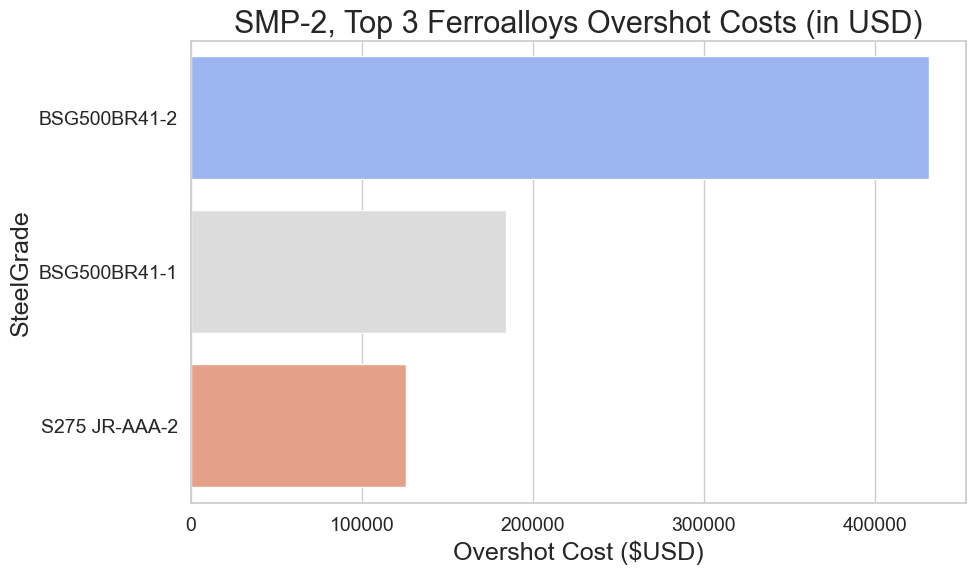

In [48]:



import seaborn as sns



final_results_fff = final_results[final_results["SteelGrade"]!= "Total"]
fff = final_results_fff.nlargest(3, 'Ferroalloys Overshot Cost ($USD)')


# Setting the theme for Seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(y='SteelGrade', x='Ferroalloys Overshot Cost ($USD)', data=fff, palette="coolwarm", orient='h')
plt.title('SMP-2, Top 3 Ferroalloys Overshot Costs (in USD)', fontsize=22)
plt.ylabel('SteelGrade', fontsize=18)
plt.xlabel('Overshot Cost ($USD)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

